Advertising Sales Channel Prediction
Problem Statement:
Sales Channel Prediction Case Study  

When a company enters a market, the distribution strategy and channel it uses are keys to its success in the market, as well as market know-how and customer knowledge and understanding. Because an effective distribution strategy under efficient supply-chain management opens doors for attaining competitive advantage and strong brand equity in the market, it is a component of the marketing mix that cannot be ignored . 

The distribution strategy and the channel design have to be right the first time. The case study of Sales channel includes the detailed study of TV, radio and newspaper channel. The predict the total sales generated from all the sales channel.  

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/Advertising.csv')
df

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
...,...,...,...,...,...
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5


In [3]:
type(df)

pandas.core.frame.DataFrame

#This is my dataset,here i have to predict the Sales of channel and my target column is Sales

In [4]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,radio,newspaper,sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


After looking the head and tail of dataset i undrstand that this is the regression based problem i have to use Regression Model. 

In [7]:
df.isnull()

,Unnamed: 0,TV,radio,newspaper,sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
195,False,False,False,False,False
196,False,False,False,False,False
197,False,False,False,False,False
198,False,False,False,False,False


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
radio         0
newspaper     0
sales         0
dtype: int64

Here i can see that there are no null values,and here i can see that column unnamed is looks like an index of data set and i dont need this for prediction so i am going to drop this column. 

In [10]:
df=df.drop(['Unnamed: 0'],axis= 1)

In [11]:
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


#EDA

In [12]:
df.shape

(200, 4)

here in my dataset i have 200 rows and 4 columns present

In [14]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

These are the features of my dataset

In [18]:
df.nunique()

TV           190
radio        167
newspaper    172
sales        121
dtype: int64

In [21]:
df['sales'].nunique()

121

In [ ]:
no.of unique values in target columns

In [22]:
df['sales'].value_counts()

9.7     5
11.7    4
12.9    4
15.9    4
20.7    3
       ..
17.0    1
18.3    1
22.3    1
14.0    1
25.5    1
Name: sales, Length: 121, dtype: int64

These are the value counts of unique values.

In [23]:
#checking blank space in sales column
df.loc[df['sales']==" "]

,TV,radio,newspaper,sales


visaualising the null values

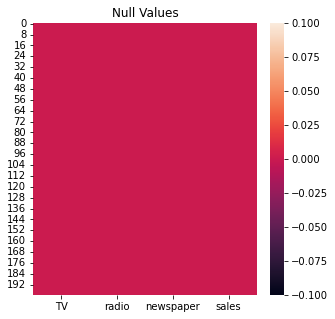

In [19]:
plt.figure(figsize=[5,5])
sns.heatmap(df.isnull())
plt.title("Null Values")
plt.show()

No null value present in dataset

In [24]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


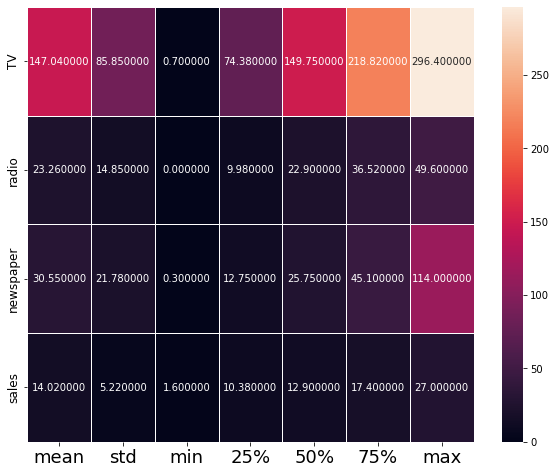

In [46]:
plt.figure(figsize=(10,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=1,annot=True,fmt='f')
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.show()

Here we obsereve the statistical obervations of datset
1)The counts of all columns are same
2)we can see the mean of all coulms
3)we can see the std deviation of all columns
4)min values of columns and here no min value is present in radio columns
5)and we can see all the columns 25%,50%,75%, max values have difference means there skewness is present in the dadaset and have outliers. 

<AxesSubplot:xlabel='sales', ylabel='TV'>

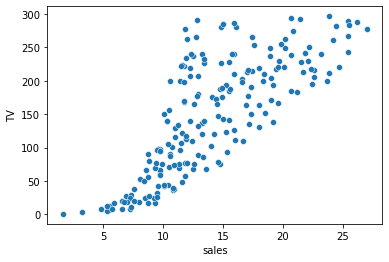

In [26]:
#cheking relation between columns and target columns
sns.scatterplot(x="sales",y="TV",data=df)

tv and sales are positively correlated

<AxesSubplot:xlabel='sales', ylabel='radio'>

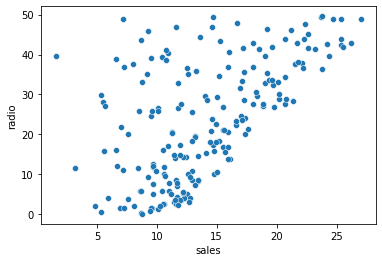

In [28]:
sns.scatterplot(x='sales',y='radio',data=df)

Here we can see that radio if radio is increasing sales also increase 

<AxesSubplot:xlabel='sales', ylabel='newspaper'>

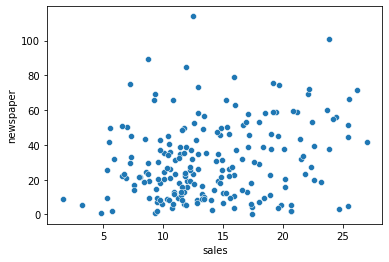

In [29]:
sns.scatterplot(x='sales',y='newspaper',data=df)

relation between sales and newspaper is very scatterd not understanding.


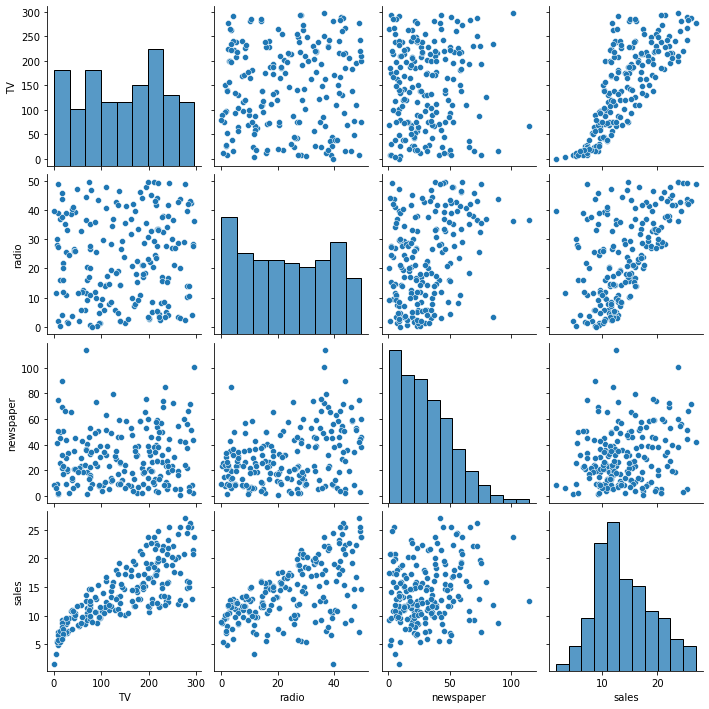

In [30]:
sns.pairplot(df)

In [38]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


Here we can see that all the columns are positively correlated.
and maxi.correlation with target column is tv
and min. corretaion with target column is newspaper.

<AxesSubplot:>

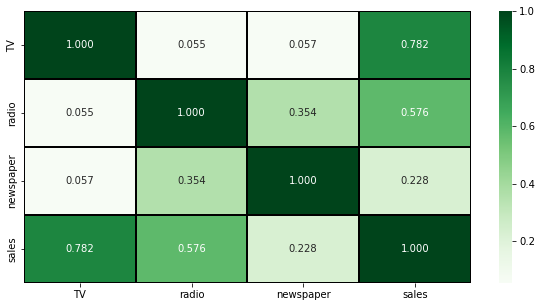

In [37]:
#visualizing the correlation
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True,linewidths=.4,linecolor='black',cmap='Greens',fmt='.3f')

<AxesSubplot:>

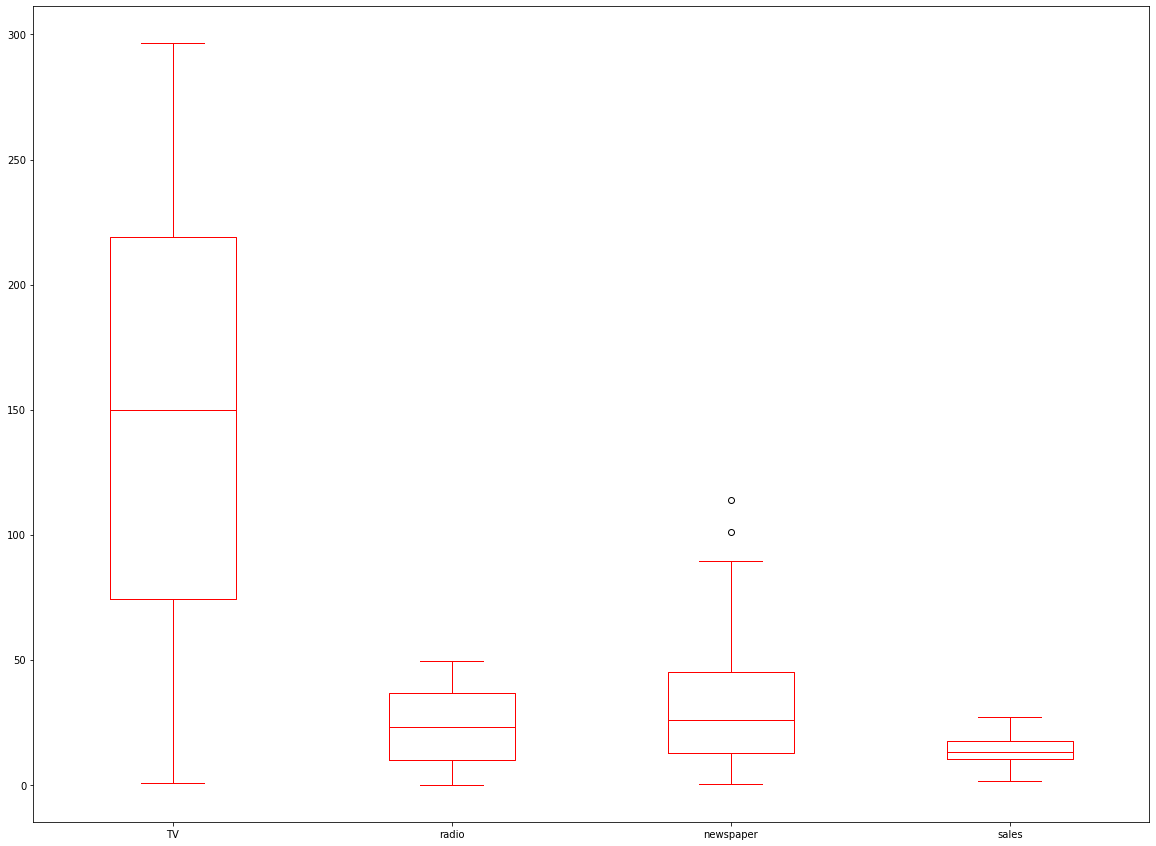

In [47]:
#checking outliers
df.plot(kind='box',fontsize=10,figsize=(20,15),color='r')


Here we can see some outliers are present in newpaper column.

In [48]:
#checking skewness
df.skew()

TV          -0.069853
radio        0.094175
newspaper    0.894720
sales        0.407571
dtype: float64

Here in column newspaper has skewness.


<AxesSubplot:xlabel='TV', ylabel='Density'>

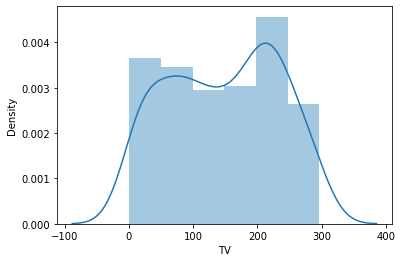

In [49]:
#visualizing the skewness
sns.distplot(df['TV'])

TV column is almost normally distributed

<AxesSubplot:xlabel='radio', ylabel='Density'>

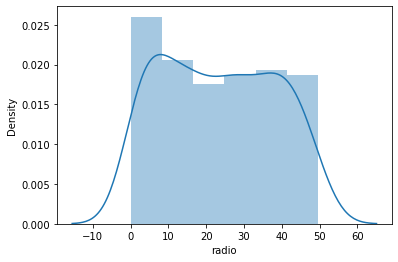

In [50]:
sns.distplot(df['radio'])

radio column is almost normally distributed

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

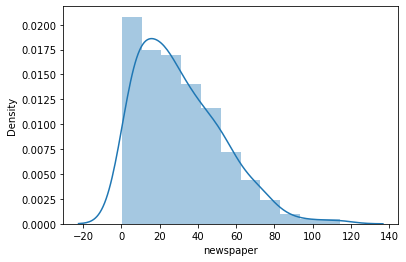

In [51]:
sns.distplot(df['newspaper'])

newspaper column is not normally distributed it has skewness


#removing outliers

In [53]:
outliercol=df[['newspaper']]

In [54]:
from scipy.stats import zscore
z=np.abs(zscore(outliercol))
df_new=df[(z<3).all(axis=1)]

In [58]:
df_new

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [55]:
df.shape

(200, 4)

In [56]:
df_new.shape

(198, 4)

In [57]:
#checking dataloss
Dataloss=(((200-198)/200)*100)
Dataloss

1.0

Here after doing zcore my data loss=1% 

#Removing skewness

In [60]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper    0.650112
sales        0.407130
dtype: float64

In [62]:
skewcol=['newspaper']

In [63]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer(method='yeo-johnson')
df_new[skewcol]=scaler.fit_transform(df_new[skewcol].values)

In [64]:
df_new.skew()

TV          -0.082332
radio        0.114842
newspaper   -0.101288
sales        0.407130
dtype: float64

<AxesSubplot:xlabel='newspaper', ylabel='Density'>

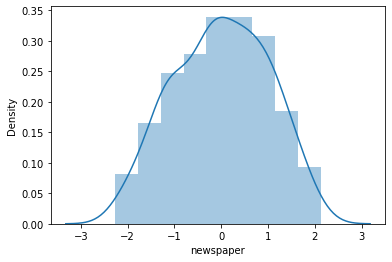

In [65]:
sns.distplot(df_new['newspaper'])

Here we can see that the newpaper now almost normally distributed.

In [66]:
#dividing data into x and y
x=df_new.drop('sales',axis=1)
y=df_new['sales']

In [67]:
x.head()

,TV,radio,newspaper
0,230.1,37.8,1.604196
1,44.5,39.3,0.831044
2,17.2,45.9,1.607052
3,151.5,41.3,1.283768
4,180.8,10.8,1.280622


In [68]:
x.shape

(198, 3)

In [69]:
y.head()

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [71]:
y.shape

(198,)

#scaling data using minmax scaler

In [72]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [73]:
mms=MinMaxScaler()
x = pd.DataFrame(mms.fit_transform(x), columns=x.columns)

In [74]:
x

,TV,radio,newspaper
0,0.783202,0.762097,0.878788
1,0.149539,0.792339,0.703678
2,0.056333,0.925403,0.879435
3,0.514851,0.832661,0.806215
4,0.614886,0.217742,0.805502
...,...,...,...
193,0.128030,0.074597,0.359758
194,0.319222,0.098790,0.255878
195,0.601912,0.187500,0.217749
196,0.965859,0.846774,0.859129


#Finding best random state

In [75]:
from sklearn.linear_model import LinearRegression
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state =i)
    mod = LinearRegression()
    mod.fit(x_train, y_train)
    pred = mod.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu," on Random_state ",maxRS)

Best accuracy is  0.9358346827439895  on Random_state  90


In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

#Regression Algorithms

In [79]:
#importing necessary libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score

In [81]:
RFR=RandomForestRegressor()
RFR.fit(x_train,y_train)
pred=RFR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9712395103245984


In [82]:
DTR=DecisionTreeRegressor()
DTR.fit(x_train,y_train)
pred=DTR.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.960868935305563


In [83]:
svr=SVR()
svr.fit(x_train,y_train)
pred=svr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9388708730222921


In [84]:
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9358346827439895


In [85]:
knnr=KNN()
knnr.fit(x_train,y_train)
pred=knnr.predict(x_test)
print('R2_score:',r2_score(y_test,pred))

R2_score: 0.9418441969804539


#Cross Validation Score:

In [86]:
print(cross_val_score(RFR,x,y,cv=5).mean())

0.9758319298243258


In [87]:
print(cross_val_score(DTR,x,y,cv=5).mean())

0.9545303622454873


In [88]:
print(cross_val_score(svr,x,y,cv=5).mean())

0.91278463451271


In [89]:
print(cross_val_score(lr,x,y,cv=5).mean())

0.8857739370001966


In [90]:
print(cross_val_score(knnr,x,y,cv=5).mean())

0.9407052322824345


After finding r2score and cross valscore i find that in Randomforestregressor has very less differece and learning very well. so i will go with RFR model

#Hyperparameter tunning:

In [91]:
#importing necessary libraries
from sklearn.model_selection import GridSearchCV

In [102]:
parameterss = {'max_features':['auto','sqrt','log2'],
             'criterion':['mse','mae']}

In [103]:
GCV=GridSearchCV(RFR,parameterss,cv=5)


In [104]:
GCV.fit(x_train,y_train)



GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['mse', 'mae'],
                         'max_features': ['auto', 'sqrt', 'log2']})

In [106]:
print(GCV.best_params_)

{'criterion': 'mse', 'max_features': 'auto'}


In [115]:
RFR=RandomForestRegressor(criterion="mse",max_features="auto")
RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)
pred_sales=RFR.predict(x_test)
RFR=r2_score(y_test,pred)
print('R2score:',RFR*100)

R2score: 94.18441969804539


After tuning RFR model i'm getting 94.18% as best r2_score.

#saving the model

In [116]:
import pickle
filename='Advertising_sales'
pickle.dump(RFR,open(filename,'wb'))